This is the traffic volume data fo rMinneapolis-St Paul, MN westbound I-94.
There are no missing values in this dataset so no need to make acceptions for it.

In [1]:
# https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

path = 'Metro_Interstate_Traffic_Volume.csv'
f = open(path, 'r')

In [2]:
dataset = []
header = f.readline().strip().split(',')
for line in f:
    line = line.split(',')
    dataset.append(line)

In [3]:
N = len(dataset)
N

48204

In [4]:
header

['holiday',
 'temp',
 'rain_1h',
 'snow_1h',
 'clouds_all',
 'weather_main',
 'weather_description',
 'date_time',
 'traffic_volume']

In [5]:
header.index('traffic_volume')

8

In [6]:
header.index('temp')

1

In [7]:
y = [float(d[1]) for d in dataset]

In [8]:
def feature(datum):
    feat = [1, float(datum[8])]
    return feat

In [9]:
X = [feature(d) for d in dataset]

In [10]:
X[:10]

[[1, 5545.0],
 [1, 4516.0],
 [1, 4767.0],
 [1, 5026.0],
 [1, 4918.0],
 [1, 5181.0],
 [1, 5584.0],
 [1, 6015.0],
 [1, 5791.0],
 [1, 4770.0]]

In [11]:
y[:10]

[288.28, 289.36, 289.58, 290.13, 291.14, 291.72, 293.17, 293.86, 294.14, 293.1]

In [12]:
import numpy
theta, residuals,rank,s = numpy.linalg.lstsq(X,y)

<ipython-input-12-af50c4dbc7d9>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta, residuals,rank,s = numpy.linalg.lstsq(X,y)


In [13]:
theta

array([2.78354428e+02, 8.74724440e-04])

Our line of best fit for traffic prediction based on temp would be
traffic = 2.78354428e+02 + 8.74724440e-04 * temp

Gradient Descent using tensorflow

In [14]:
path = 'Metro_Interstate_Traffic_Volume.csv'
f = open(path, 'r')

dataset = []
header = f.readline().strip().split(',')
for line in f:
    line = line.split(',')
    dataset.append(line)

In [15]:
import tensorflow as tf

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [16]:
def feature(datum):
    feat = [1, float(datum[8])]
    return feat

In [17]:
y = [float(d[1]) for d in dataset]
X = [feature(d) for d in dataset]

In [18]:
y = tf.constant(y, shape=[len(y),1])

In [19]:
K = len(X[0])
K

2

In [20]:
def MSE(X, y, theta):
    return tf.reduce_mean((tf.matmul(X,theta) - y)**2)

In [21]:
theta = tf.Variable(tf.constant([0.0]*K, shape=[K,1]))

In [22]:
# stochastic gradient descent optimizer with learning rate of 0.01
optimizer = tf.train.AdamOptimizer(0.01)

In [23]:
objective = MSE(X,y,theta)

In [24]:
train = optimizer.minimize(objective)

In [25]:
init = tf.global_variables_initializer()

In [26]:
sess = tf.Session()
sess.run(init)

In [27]:
for iteration in range(1000):
    cvalues = sess.run([train, objective])
    print("objective = " + str(cvalues[1]))

objective = 79254.67
objective = 62304.426
objective = 48372.863
objective = 37467.94
objective = 29526.0
objective = 24383.32
objective = 21746.955
objective = 21177.621
objective = 22102.234
objective = 23871.395
objective = 25855.086
objective = 27544.145
objective = 28616.08
objective = 28945.754
objective = 28571.945
objective = 27643.664
objective = 26366.459
objective = 24957.895
objective = 23615.23
objective = 22493.275
objective = 21691.236
objective = 21247.72
objective = 21143.629
objective = 21312.316
objective = 21655.828
objective = 22064.832
objective = 22438.213
objective = 22699.256
objective = 22804.957
objective = 22747.943
objective = 22551.764
objective = 22261.67
objective = 21933.121
objective = 21620.406
objective = 21367.32
objective = 21200.951
objective = 21129.186
objective = 21141.947
objective = 21215.533
objective = 21319.01
objective = 21421.234
objective = 21496.688
objective = 21529.867
objective = 21516.568
objective = 21463.066
objective = 21383.166

In [28]:
with sess.as_default():
    print(MSE(X,y,theta).eval())
    print(theta.eval())

19773.816
[[9.360891  ]
 [0.06104233]]


In [29]:
import matplotlib.pyplot as plt

In [30]:
# y-axis
temp = [float(d[1]) for d in dataset]
# x-axis
traffic_volume = [float(d[8]) for d in dataset]

Text(0.5, 1.0, 'Traffic Volume vs Temp limited to 100')

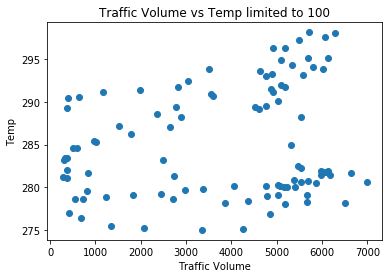

In [31]:
# first 100 points
plt.scatter(traffic_volume[:100], temp[:100])
plt.xlabel('Traffic Volume')
plt.ylabel("Temp")
plt.title("Traffic Volume vs Temp limited to 100")

Text(0.5, 1.0, 'Traffic Volume vs Temp')

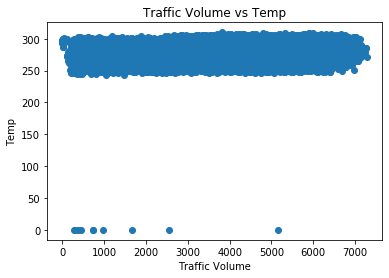

In [32]:
# all of the data points
plt.scatter(traffic_volume, temp)
plt.xlabel('Traffic Volume')
plt.ylabel("Temp")
plt.title("Traffic Volume vs Temp")